In [1]:
# these are all imports needed to complete the dataloading process
import torch
#torchvision.io handles input output operations
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
from torchvision.io import read_video
import glob

In [2]:
class CustomImageDataset(Dataset): 
    def __init__(self):
        self.n_frames_per_video = 150
        self.paths = []
        
        folders = glob.glob(root_path)
        
        for folder in folders:
            sub_folders = glob.glob(folder + "\*")
            for sub_folder in sub_folders:
                files = glob.glob(sub_folder + "\*.avi")
                for file in files:
                    self.paths.append(file)
                    
    def __len__(self):
        return len(self.paths)*self.n_frames_per_video
    
    def __getitem__(self, idx):
        path_idx = idx // self.n_frames_per_video
        frame_idx = idx % self.n_frames_per_video
        
        path = self.paths[path_idx]
        example = read_video(path)
        
        video_data = example[0]
        frame_data = video_data[frame_idx]
        
        label = not 'NonFight' in path
        return frame_data, label

In [3]:
root_path = r"C:\RWF2000\*"

In [4]:
my_class = CustomImageDataset()

In [5]:
glob.glob(root_path)

['C:\\RWF2000\\train', 'C:\\RWF2000\\val']

In [6]:
len(my_class)

300000

In [7]:
resp = my_class[179]

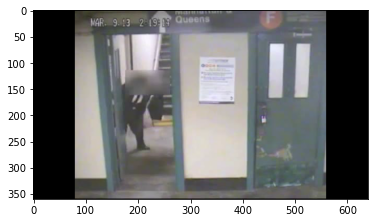

In [8]:
plt.imshow(resp[0])

In [9]:
#code learned from eustis and pytorch tutorial
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#this is for the loss function stated in eustis' video and explained further by pytorch tutorials
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):  

    running_loss = 0.0
    for i, data in enumerate(my_class, 0):
        
        inputs, labels = data

        
        optimizer.zero_grad()

        
        #outputs = net(inputs)
        #loss = criterion(outputs, labels)
        #loss.backward()
        #optimizer.step()

        
        #running_loss += loss.item()
        #if i % 2000 == 1999:    
            #print('[%d, %5d] loss: %.3f' %
                  #(epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

#print('done training!')

KeyboardInterrupt: 

In [12]:
%pwd

'C:\\Users\\eisha\\CS196'